# Importing libraries

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import io

# About the Dataset
## Dataset Description
#### This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.



## Column Description

* Fields include
 

* Rank - Ranking of overall sales
 

* Name - The games name
 

* Platform - Platform of the games release (i.e. PC,PS4, etc.)
 

* Year - Year of the game's release
 

* Genre - Genre of the game
 

* Publisher - Publisher of the game
 

* NA_Sales - Sales in North America (in millions)
 

* EU_Sales - Sales in Europe (in millions)
 

* JP_Sales - Sales in Japan (in millions)
 

* Other_Sales - Sales in the rest of the world (in millions)
 

* Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.


# Importing Dataset

In [ ]:
df = pd.read_csv("./vgsales.csv")
regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [4]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


In [5]:
print(df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [6]:
print(df.info)

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

In [7]:
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


# Exploratory Data Analysis

## Games by platform

In [29]:
df_platform = df.groupby(['Platform'])['Name'].count().reset_index()
df_platform.sort_values(by='Name' , inplace=True, ascending= False)
print(df_platform.head())

   Platform  Name
4        DS  2163
16      PS2  2161
17      PS3  1329
26      Wii  1325
28     X360  1265


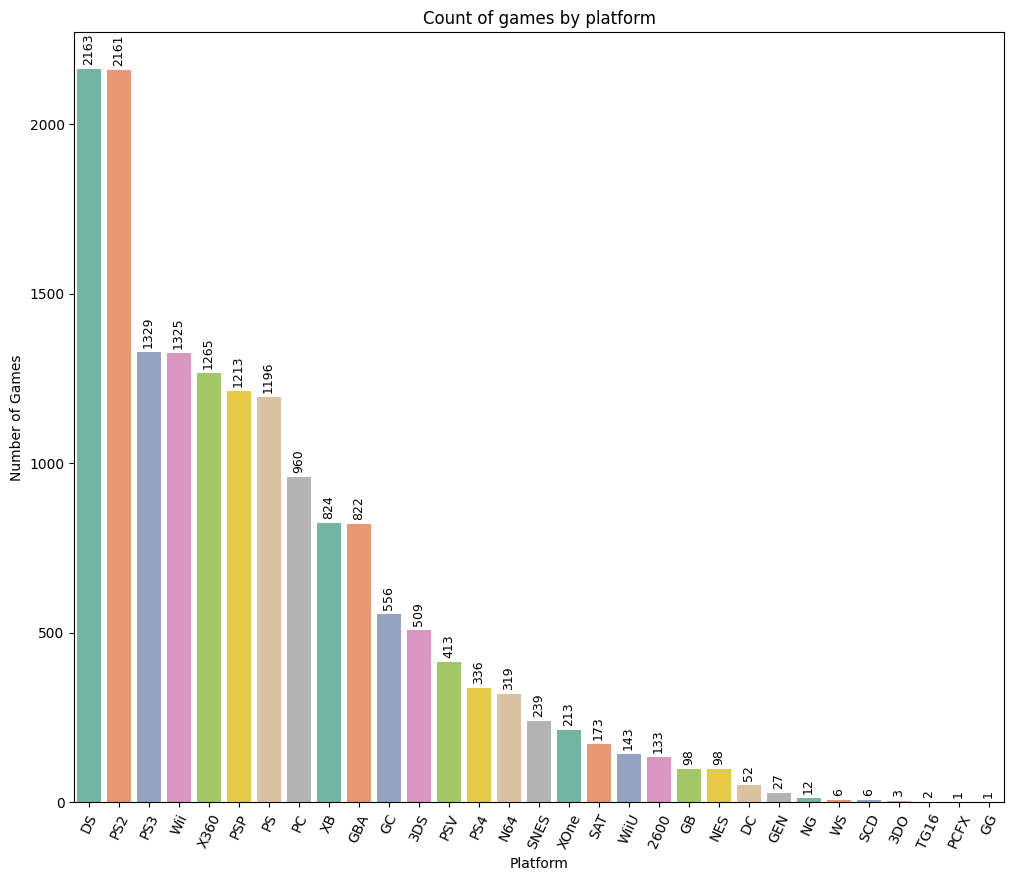

In [89]:
plt.figure(figsize=(12,10))
ax0 = sns.barplot(data=df_platform, x='Platform', y ='Name', hue = 'Platform', palette= 'Set2')
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.title("Count of games by platform")
plt.xticks(rotation = 65)
for i in ax0.patches:
    height = i.get_height()
    px = i.get_x()
    ax0.text(x = px + 0.15, y = height + 12, s = int(height), ha ='left', va = 'bottom', fontsize=9, rotation = 90)
plt.show()

## Genre by platform

In [126]:
df_genre = df.groupby(['Platform', 'Genre'])['Name'].count().reset_index()
df_genre.columns = ['Platform', 'Genre', 'Count']
df_genre.sort_values(by =['Platform','Count'], ascending=[False, False], inplace= True)
print(df_genre.head(25))

    Platform         Genre  Count
282     XOne        Action     68
291     XOne        Sports     36
289     XOne       Shooter     33
287     XOne        Racing     19
285     XOne          Misc     15
288     XOne  Role-Playing     13
283     XOne     Adventure     12
284     XOne      Fighting      7
286     XOne      Platform      4
290     XOne    Simulation      3
292     XOne      Strategy      3
280       XB        Sports    170
270       XB        Action    155
278       XB       Shooter    132
276       XB        Racing    123
274       XB      Platform     49
272       XB      Fighting     48
273       XB          Misc     46
271       XB     Adventure     26
279       XB    Simulation     24
277       XB  Role-Playing     23
281       XB      Strategy     21
275       XB        Puzzle      7
258     X360        Action    324
268     X360        Sports    220


<Figure size 1200x1000 with 0 Axes>

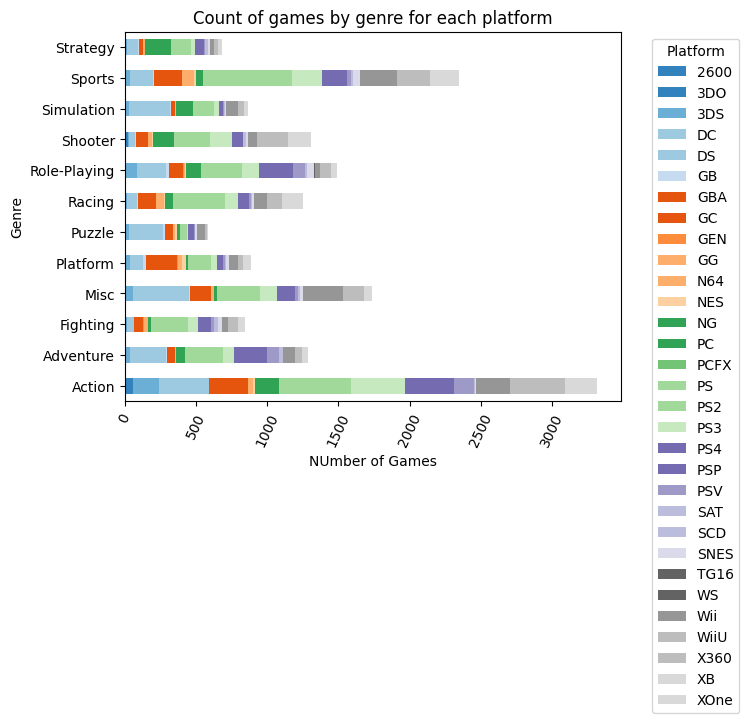

In [ ]:
df_pivot = df_genre.pivot(index='Genre', columns='Platform', values='Count')
plt.figure(figsize=(12,10))

df_pivot.plot(kind='barh', stacked=True, colormap = 'tab20c')
plt.xlabel("Nu mber of Games")
plt.ylabel("Genre")
plt.title("Count of games by genre for each platform")
plt.xticks(rotation = 65)
plt.legend(title = "Platform", bbox_to_anchor = (1.05,1))
plt.show()

## Games by year

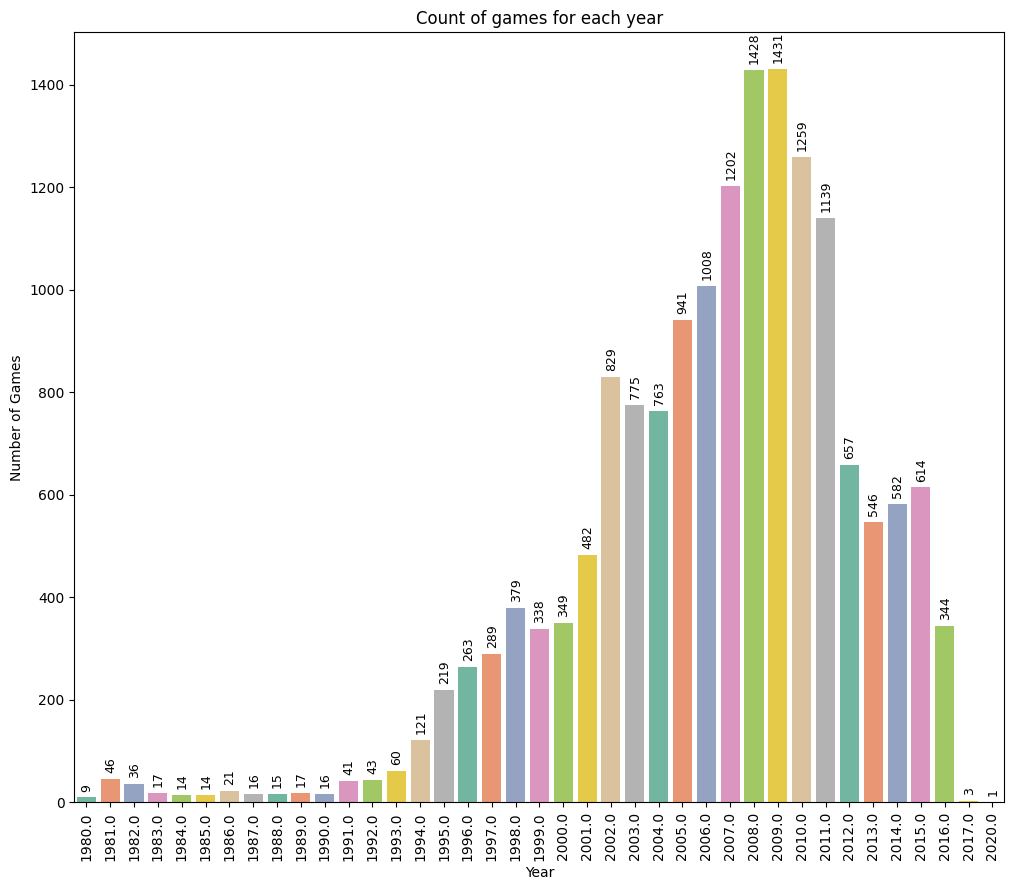

In [10]:
df_year = df.groupby(['Year'])['Name'].count().reset_index()
df_year.columns = ['Year', 'Count']
plt.figure(figsize=(12,10))
ax1 = sns.barplot(data=df_year, x='Year', y ='Count', hue='Year',palette= 'Set2', legend=False)
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.title("Count of games for each year")
plt.xticks(rotation = 90)
for i in ax1.patches:
    height = i.get_height()
    px = i.get_x()
    ax1.text(x = px + 0.15, y = height + 12, s = int(height), ha ='left', va = 'bottom', fontsize=9, rotation = 90)
plt.show()

## Games by genre for each year

In [64]:
df_genre_year= df.groupby(['Year', 'Genre'])['Name'].count().reset_index()
df_genre_year.columns = ['Year', 'Genre', 'Count']
df_genre_year = df_genre_year.fillna(0)
df_pivot = df_genre_year.pivot(index='Year', columns='Genre', values='Count')
df_pivot = df_pivot.fillna(0)
print(df_pivot.head())


Genre   Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Year                                                                  
1980.0     1.0        0.0       1.0   4.0       0.0     0.0     0.0   
1981.0    25.0        0.0       0.0   0.0       3.0     2.0     1.0   
1982.0    18.0        0.0       0.0   1.0       5.0     3.0     2.0   
1983.0     7.0        1.0       0.0   1.0       5.0     1.0     0.0   
1984.0     1.0        0.0       0.0   1.0       1.0     3.0     3.0   

Genre   Role-Playing  Shooter  Simulation  Sports  Strategy  
Year                                                         
1980.0           0.0      2.0         0.0     1.0       0.0  
1981.0           0.0     10.0         1.0     4.0       0.0  
1982.0           0.0      5.0         0.0     2.0       0.0  
1983.0           0.0      1.0         0.0     1.0       0.0  
1984.0           0.0      3.0         0.0     2.0       0.0  


<Figure size 1800x1800 with 0 Axes>

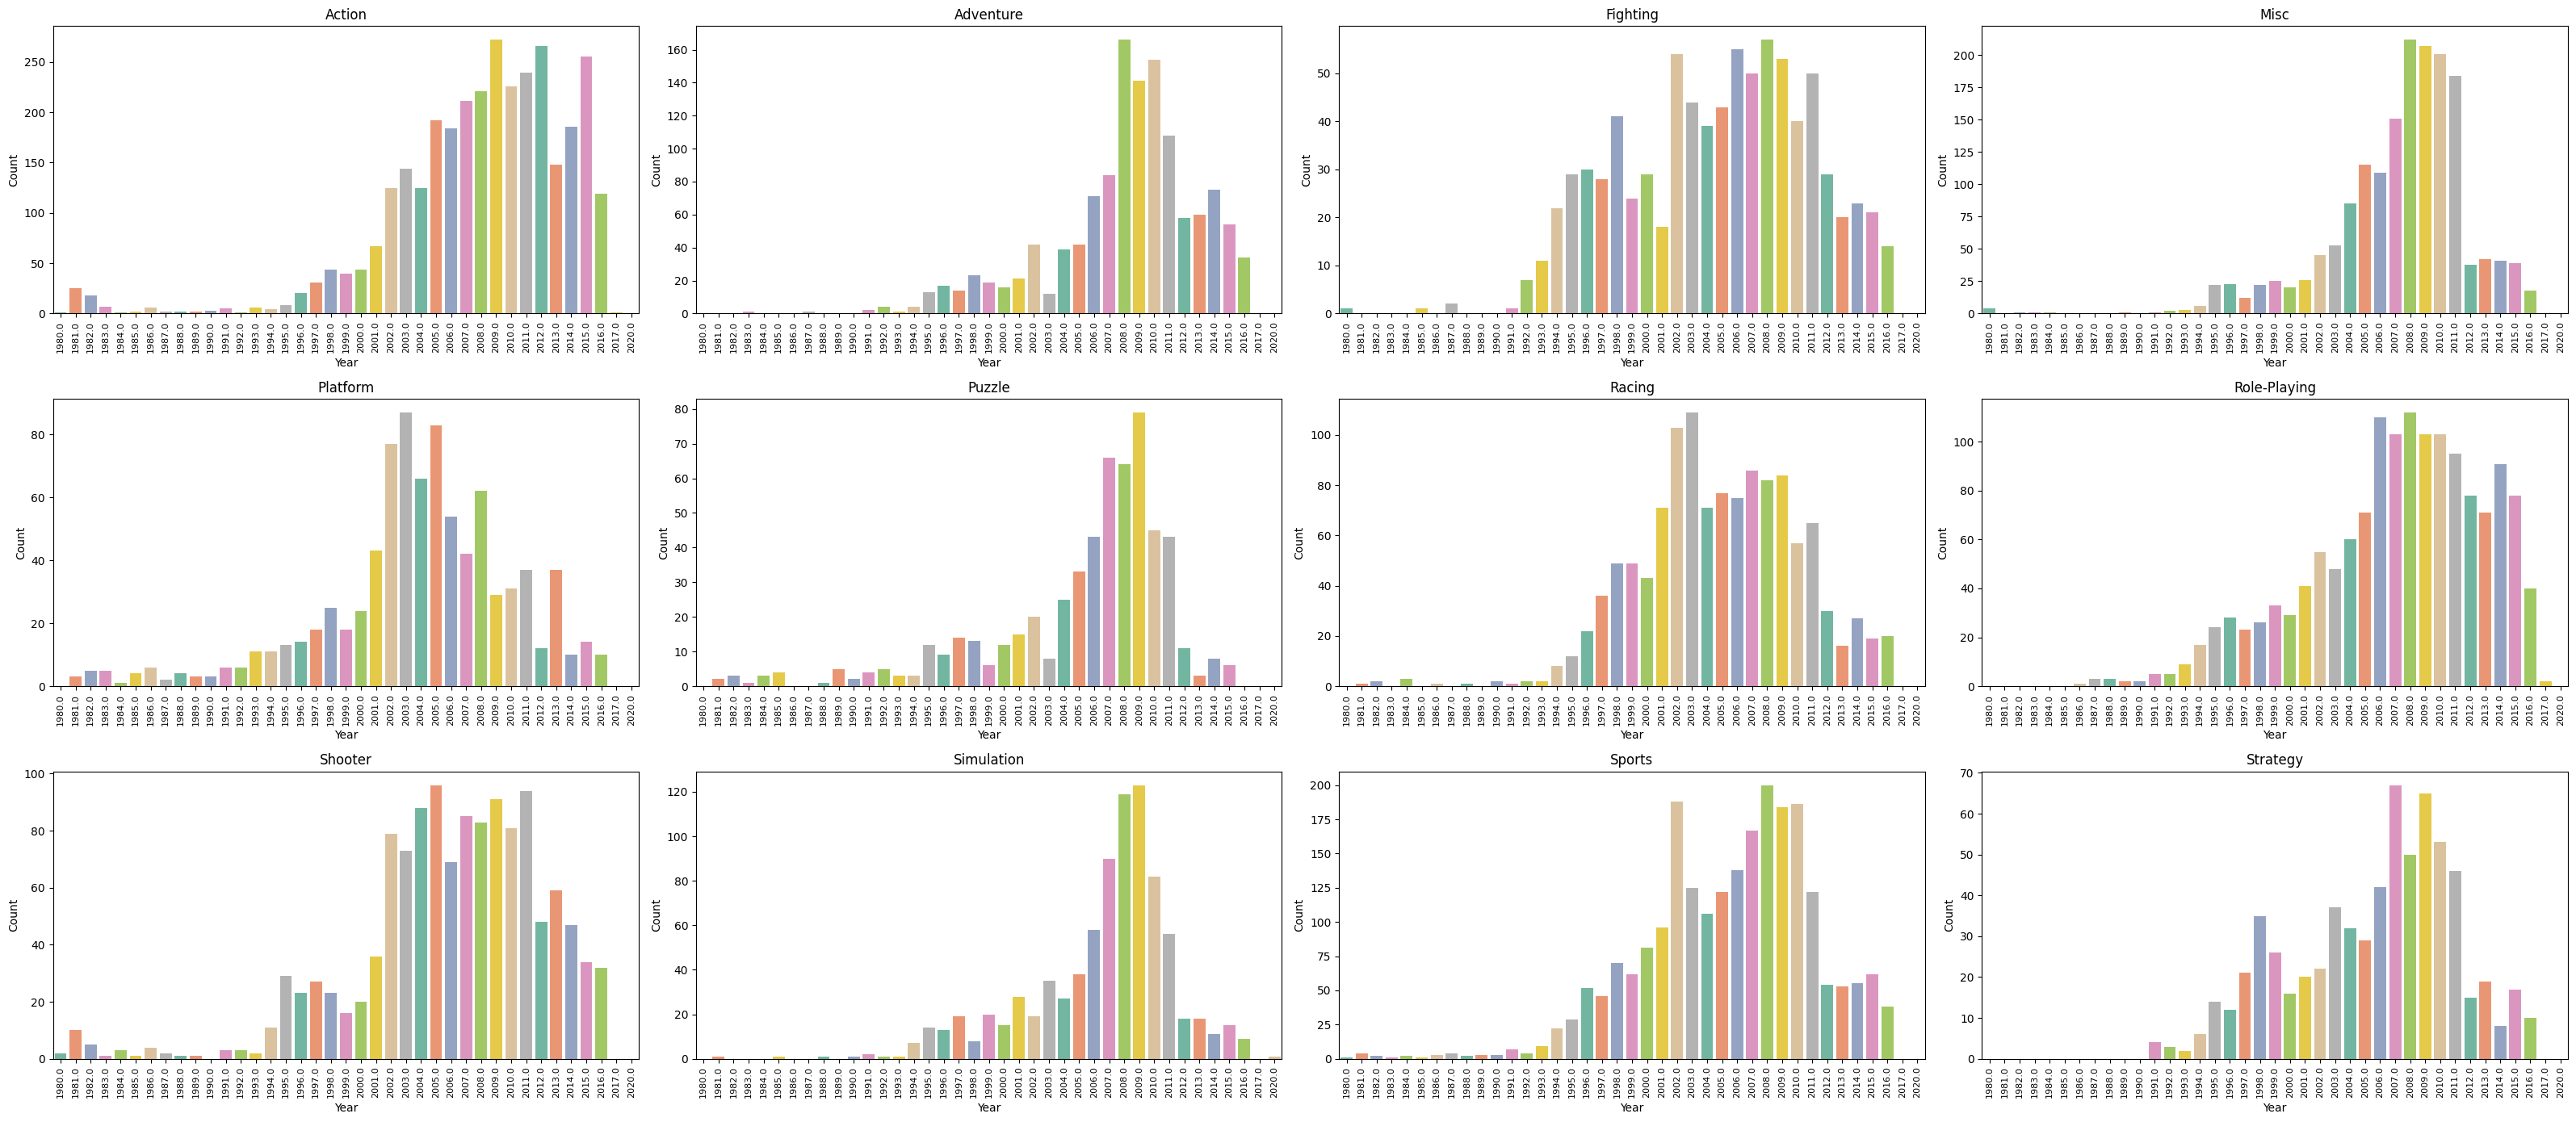

In [67]:
plt.figure(figsize=(18,18))
genres = df_pivot.columns
number_col = 4
number_row = 3
fig, axes = plt.subplots(number_row, number_col, figsize=(32,14))
axes = axes.flatten()
for i, genre in enumerate(df_pivot.columns):
    ax = axes[i]
    sns.barplot(x=df_pivot.index, y=df_pivot[genre], hue =df_pivot.index ,palette="Set2", ax=ax, legend=False)
    ax.set_title(genre)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=90, labelsize= 8)
    
plt.tight_layout()
plt.show()

## Game by publisher for each year

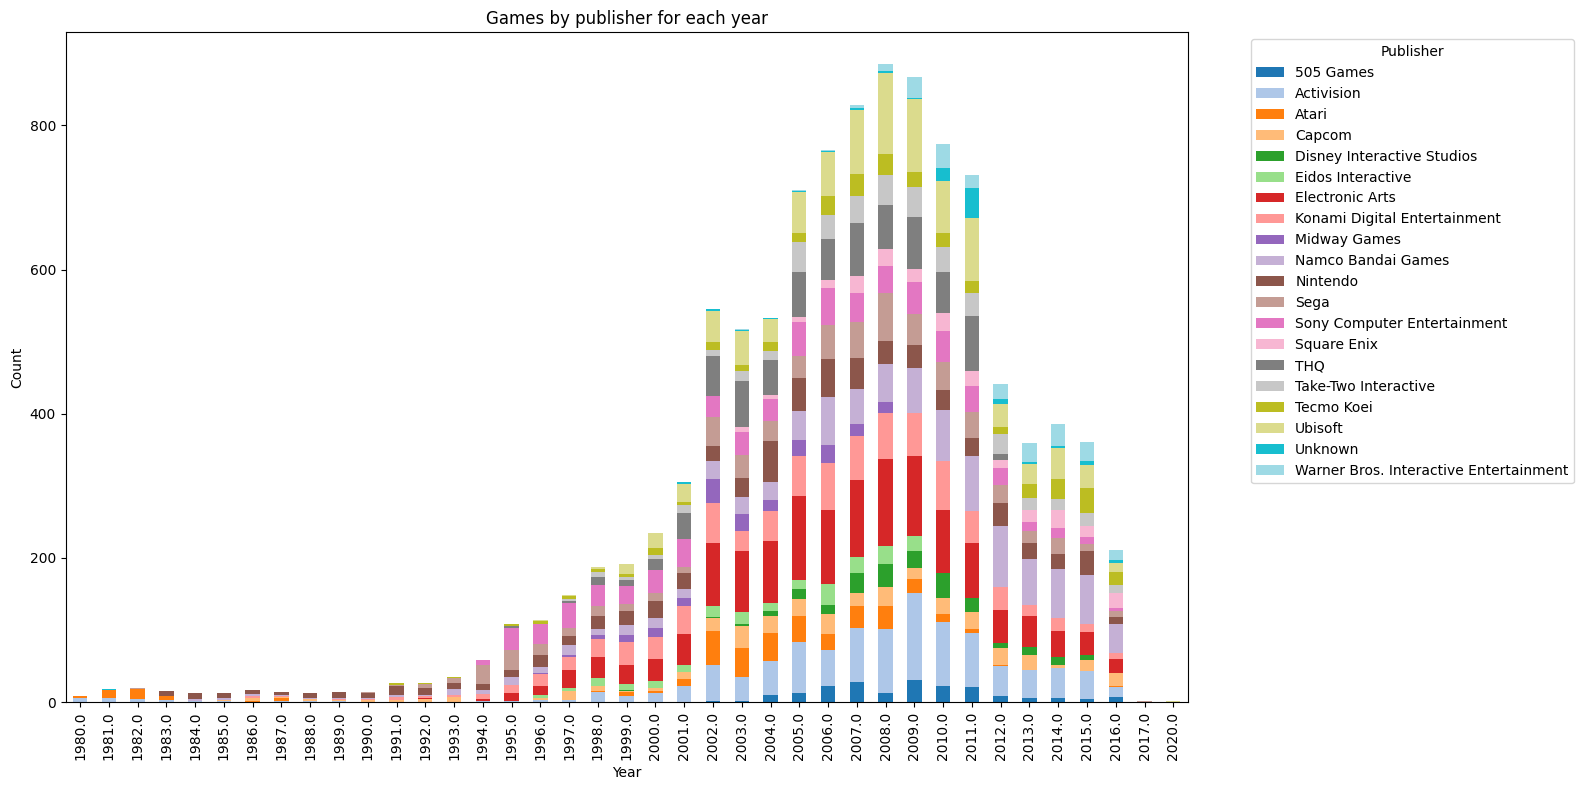

In [110]:
publisher_counts = df.groupby("Publisher")["Name"].count().reset_index(name="total")
valid_publishers = publisher_counts.query("total > 190")["Publisher"]
df_publisher = (df.query("Publisher in @valid_publishers").groupby(["Year", "Publisher"])["Name"].count().reset_index())
columns = ['Year','Publisher', 'Count']
df_publisher.columns = columns
df_pivot = df_publisher.pivot(index='Year', columns='Publisher',values='Count')
df_pivot = df_pivot.fillna(0)
df_pivot.head(10)
df_pivot.plot(kind='bar', stacked=True, figsize=(16,8), colormap="tab20")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Games by publisher for each year")
plt.legend(title="Publisher", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.figure(figsize=(14,8))
#plt.stackplot(df_pivot.index, df_pivot.T, labels=df_pivot.columns, colors=sns.color_palette("tab20", n_colors=20))
#plt.legend(title="Publisher", bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.title("Top 20 Publishers - Evolución de Publicaciones", fontsize=16)
#plt.xlabel("Año")
#plt.ylabel("Número de Juegos Publicados")
#plt.tight_layout()
#plt.show()

## Sales by year


In [83]:
df_sales = df.groupby(['Year'])[['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']].sum()
print(df_sales.head())

        NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                           
1980.0     10.59      0.67      0.00         0.12         11.38
1981.0     33.40      1.96      0.00         0.32         35.77
1982.0     26.92      1.65      0.00         0.31         28.86
1983.0      7.76      0.80      8.10         0.14         16.79
1984.0     33.28      2.10     14.27         0.70         50.36


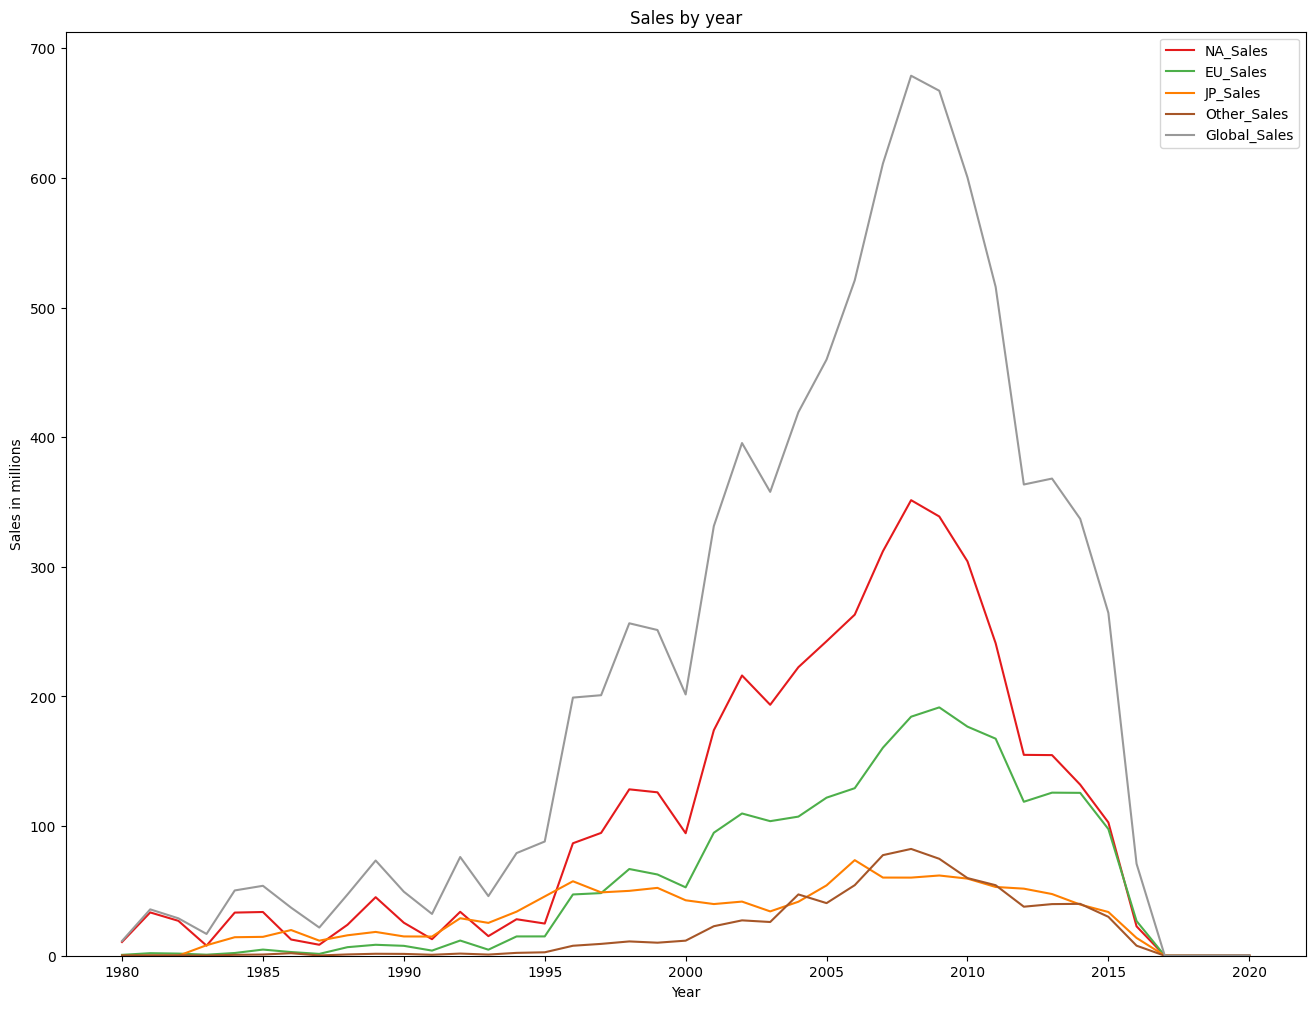

In [92]:
df_sales.plot(kind='line', colormap="Set1", figsize=(16,12))
plt.xlabel("Year")
plt.ylabel("Sales in millions")
plt.title("Sales by year")
plt.axis(ymin = 0)
plt.show()

## Sales by Genre for each region ordered by year

In [27]:
df_genre_sales = df.groupby(['Year', 'Genre'])[['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales']].sum().reset_index()
print(df_genre_sales.head())

     Year     Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0  1980.0    Action      0.32      0.02       0.0         0.00
1  1980.0  Fighting      0.72      0.04       0.0         0.01
2  1980.0      Misc      2.53      0.15       0.0         0.02
3  1980.0   Shooter      6.56      0.43       0.0         0.08
4  1980.0    Sports      0.46      0.03       0.0         0.01


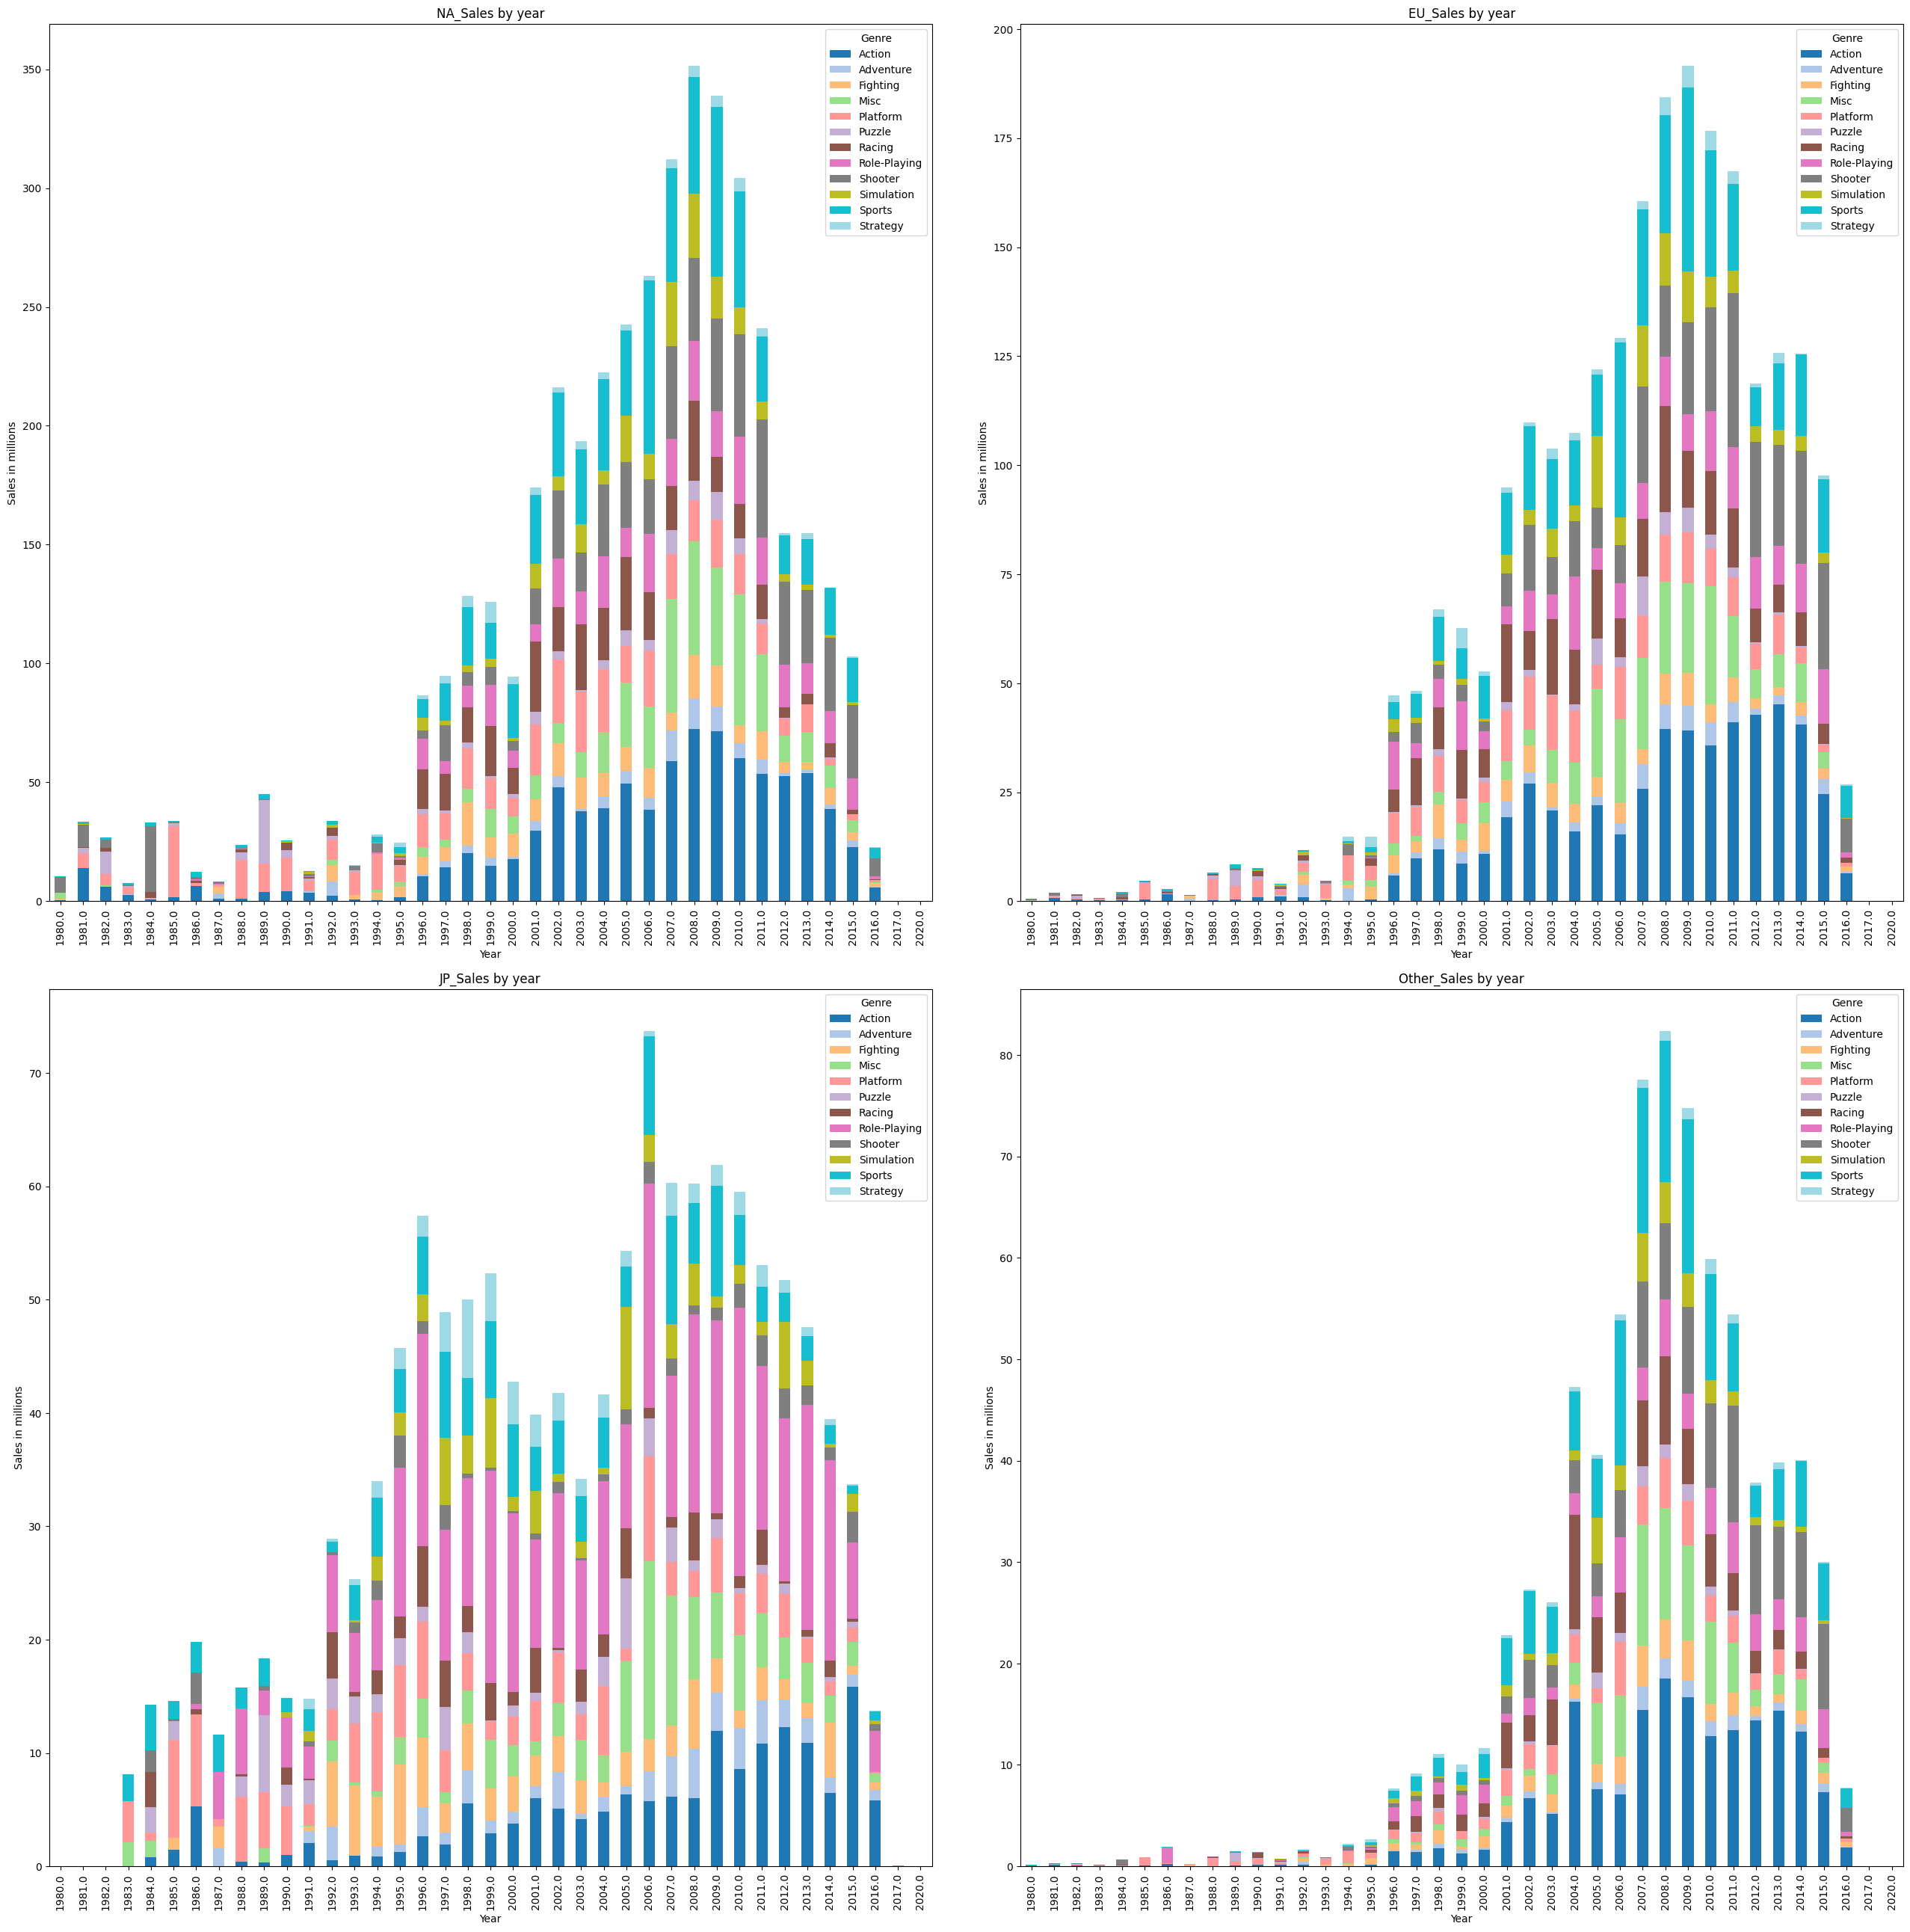

In [ ]:
n_col = 2
n_row = 2
fig, axes = plt.subplots(n_row, n_col, figsize= (32,32), gridspec_kw={'hspace':0.1, 'wspace':0.1})
axes = axes.flatten()
df_pivot = df_genre_sales.pivot(index='Year' , columns='Genre', values=regions)

for i, region in enumerate(regions):
    ax = axes[i]
    df_pivot[region].plot(kind='bar', stacked= True, ax=axes[i], figsize=(32,32), colormap="tab20")
    axes[i].set_ylim(bottom=0)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Sales in millions")
    axes[i].set_title(f"{region} by year")
plt.show()
    



## Sales by genre global 

Text(0, 0.5, 'Sales in millions')

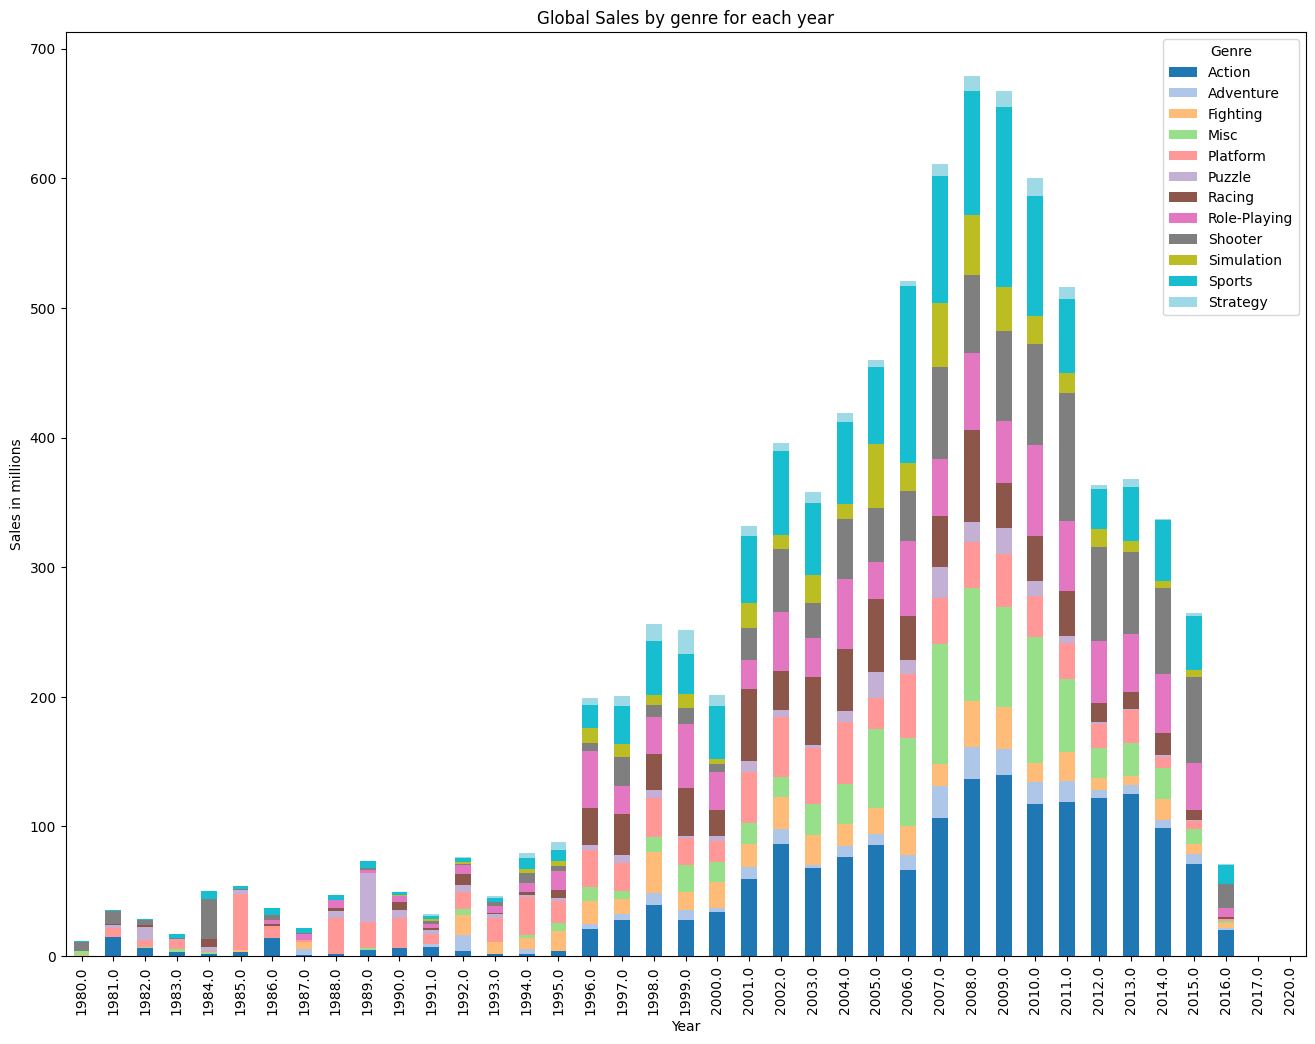

In [94]:
df_genre_sales_global = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
df_pivot = df_genre_sales_global.pivot(index = 'Year', columns = 'Genre', values = 'Global_Sales')
df_pivot = df_pivot.fillna(0)
df_pivot.plot(kind='bar',stacked=True ,colormap = "tab20", figsize= (16,12))
plt.title("Global Sales by genre for each year")
plt.xlabel("Year")
plt.ylabel("Sales in millions")

## Sales by publisher

(0.0, 215.89049999999997)

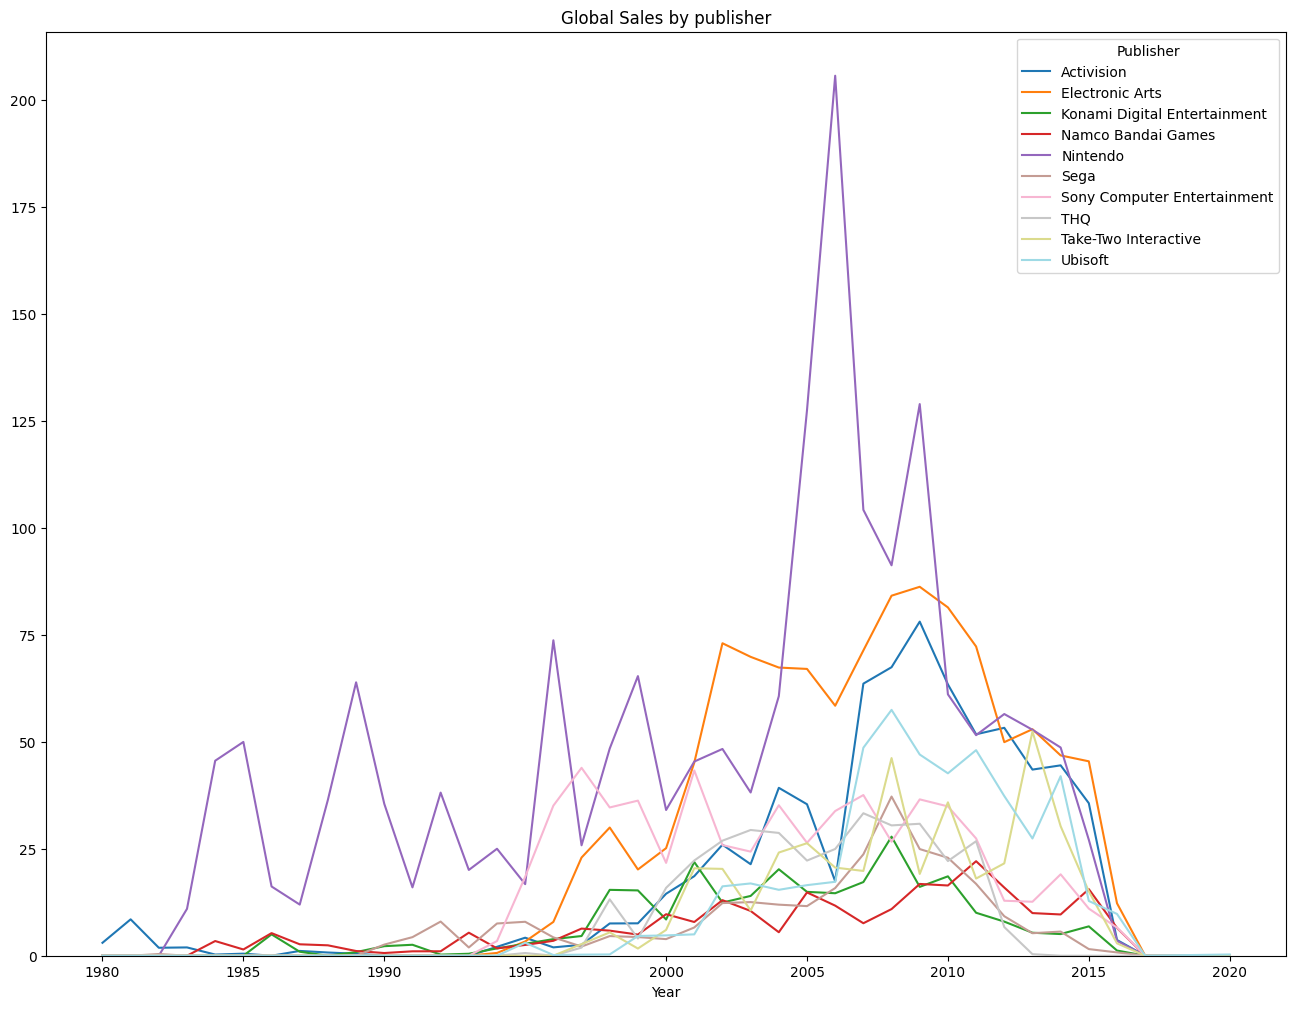

In [105]:
publisher_counts = df.groupby("Publisher")["Name"].count().reset_index(name="total")
valid_publishers = publisher_counts.query("total > 400")["Publisher"]
df_sales_publisher = df.query("Publisher in @valid_publishers").groupby(['Year','Publisher'])['Global_Sales'].sum().reset_index()
df_pivot = df_sales_publisher.pivot(index = 'Year', columns='Publisher', values='Global_Sales')
df_pivot = df_pivot.fillna(0)
df_pivot.plot(kind='line', colormap="tab20", figsize=(16,12))
plt.title("Global Sales by publisher")
plt.ylim(0)

# Statistical Exploratory Analysis

## Top 5 Games by Sales

In [114]:
df_top5_games_sales = df.groupby(['Name'])['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales',ascending=False)
df_top5_games_sales.head()

,Name,Global_Sales
11007,Wii Sports,82.74
3712,Grand Theft Auto V,55.92
9327,Super Mario Bros.,45.31
9715,Tetris,35.84
5573,Mario Kart Wii,35.82
